In [21]:
#imports
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,LocallyConnected2D,Dropout
from keras import regularizers
%matplotlib inline

In [22]:
#making model
model=Sequential()
inputShape=(28,28,1)
#Conv2D did not accept(784,-1),(784,testcases) as an input shape
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))#first dropout
model.add(Conv2D(32,kernel_size=(5,5),activation='sigmoid',input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))#lesser than 0.3
model.add(LocallyConnected2D(64, (3, 3), input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax',kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax',kernel_initializer='random_uniform'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

Train on 21001 samples, validate on 21000 samples
Epoch 1/5
21001/21001 [==============================] - 31s 1ms/step - loss: 1.6351 - acc: 0.7438 - val_loss: 0.8128 - val_acc: 0.9546
Epoch 2/5
21001/21001 [==============================] - 32s 2ms/step - loss: 0.5982 - acc: 0.9617 - val_loss: 0.2987 - val_acc: 0.9765
Epoch 3/5
21001/21001 [==============================] - 29s 1ms/step - loss: 0.2455 - acc: 0.9775 - val_loss: 0.1556 - val_acc: 0.9830
Epoch 4/5
21001/21001 [==============================] - 29s 1ms/step - loss: 0.1336 - acc: 0.9839 - val_loss: 0.0971 - val_acc: 0.9863
Epoch 5/5
21001/21001 [==============================] - 35s 2ms/step - loss: 0.0976 - acc: 0.9853 - val_loss: 0.0764 - val_acc: 0.9873
Train on 21000 samples, validate on 21001 samples
Epoch 1/6
21000/21000 [==============================] - 35s 2ms/step - loss: 0.0917 - acc: 0.9821 - val_loss: 0.0468 - val_acc: 0.9930
Epoch 2/6
21000/21000 [==============================] - 43s 2ms/step - loss: 0.0665

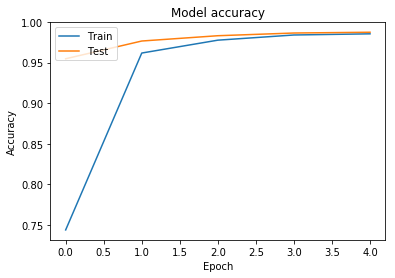

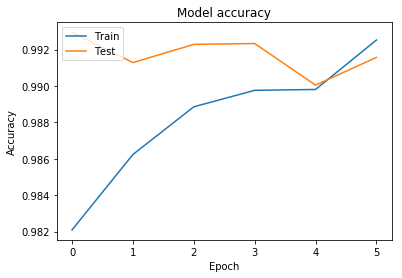

Train on 21001 samples, validate on 21000 samples
Epoch 1/5
21001/21001 [==============================] - 33s 2ms/step - loss: 0.0548 - acc: 0.9860 - val_loss: 0.0184 - val_acc: 0.9956
Epoch 2/5
21001/21001 [==============================] - 30s 1ms/step - loss: 0.0355 - acc: 0.9904 - val_loss: 0.0192 - val_acc: 0.9954
Epoch 3/5
21001/21001 [==============================] - 35s 2ms/step - loss: 0.0318 - acc: 0.9917 - val_loss: 0.0211 - val_acc: 0.9949
Epoch 4/5
21001/21001 [==============================] - 30s 1ms/step - loss: 0.0278 - acc: 0.9929 - val_loss: 0.0189 - val_acc: 0.9950
Epoch 5/5
21001/21001 [==============================] - 32s 2ms/step - loss: 0.0259 - acc: 0.9929 - val_loss: 0.0199 - val_acc: 0.9942
Train on 21000 samples, validate on 21001 samples
Epoch 1/6
21000/21000 [==============================] - 35s 2ms/step - loss: 0.0335 - acc: 0.9909 - val_loss: 0.0148 - val_acc: 0.9960
Epoch 2/6
21000/21000 [==============================] - 34s 2ms/step - loss: 0.0272

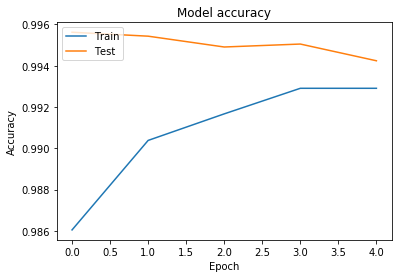

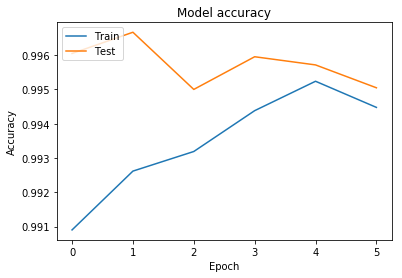

Train on 21001 samples, validate on 21000 samples
Epoch 1/5
21001/21001 [==============================] - 37s 2ms/step - loss: 0.0262 - acc: 0.9920 - val_loss: 0.0087 - val_acc: 0.9981
Epoch 2/5
21001/21001 [==============================] - 38s 2ms/step - loss: 0.0235 - acc: 0.9926 - val_loss: 0.0104 - val_acc: 0.9972
Epoch 3/5
21001/21001 [==============================] - 36s 2ms/step - loss: 0.0314 - acc: 0.9916 - val_loss: 0.0140 - val_acc: 0.9959
Epoch 4/5
21001/21001 [==============================] - 33s 2ms/step - loss: 0.0186 - acc: 0.9944 - val_loss: 0.0100 - val_acc: 0.9971
Epoch 5/5
21001/21001 [==============================] - 36s 2ms/step - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0119 - val_acc: 0.9963
Train on 21000 samples, validate on 21001 samples
Epoch 1/6
21000/21000 [==============================] - 38s 2ms/step - loss: 0.0238 - acc: 0.9932 - val_loss: 0.0075 - val_acc: 0.9979
Epoch 2/6
21000/21000 [==============================] - 59s 3ms/step - loss: 0.0177

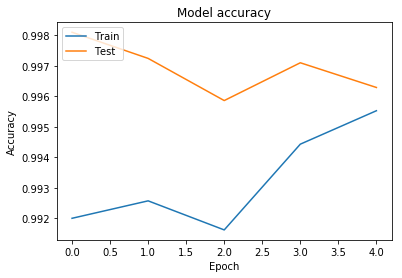

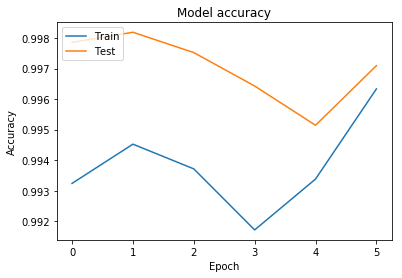

In [24]:
#making dataloader,
# this was mainly to convert pandas dataframe to numpy array
# keras inbuilt functionality and reshape functionality are
# available for numpy.

import pandas as pd
def MnistLoadData(X,Y,frac):
    lenx=len(X)
    lenY=len(Y)
    #splitting input data to test and train
    x1=X.loc[0:lenx*frac]
    x2=X.loc[lenx*(1-frac):lenx]
    y1=Y.loc[0:lenY*frac]
    y2=Y.loc[lenY*(1-frac):lenY]
    #converting pandas datafram to numpy
    #for performing reshape and using 
    #to_categorical functions of keras
    x1=x1.to_numpy()
    x2=x2.to_numpy()
    y1=y1.to_numpy()
    y2=y2.to_numpy()
    x1=x1.reshape(x1.shape[0],28,28,1)
    x2=x2.reshape(x2.shape[0],28,28,1)
    #one hot encoding functionality of keras
    #converts y to its corresponding probablity array
    #1=[1,0,0,0,0,0,0,0...]
    #2=[0,1,0,0,0,0,0,....]
    y1=keras.utils.to_categorical(y1,10)
    y2=keras.utils.to_categorical(y2,10)
    return (x1,y1),(x2,y2)

#reading dataset
dataset=pd.read_csv('dataset/digit-recognizer/train.csv')
X=dataset.drop('label',axis=1)
Y=dataset['label']

#loading data
(x1,y1),(x2,y2)=MnistLoadData(X,Y,.5)
#making model, here neural net extracts characteristic weights for this dataset
#so that it can make predictions
itrates=3
for i in range(itrates):
    history1=model.fit(x1,y1,batch_size=128,epochs=5,validation_data=(x2,y2))#epoch is set at 9 because that is where inflection happens in acc
    history2=model.fit(x2,y2,batch_size=128,epochs=6,validation_data=(x1,y1))

    import matplotlib.pyplot as plt
    # Plot training & validation accuracy values
    plt.plot(history1.history['acc'])
    plt.plot(history1.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


    plt.plot(history2.history['acc'])
    plt.plot(history2.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [25]:
#check using the second half of the dataset, how accurate the prediction is
acc=model.evaluate(x2,y2,verbose=1)
print(acc)
#loading data from csv for predictions
#xtest need not be seperated since it only has input vector
Xtest=pd.read_csv('dataset/digit-recognizer/test.csv')
Xtest=Xtest.to_numpy()
Xtest=Xtest.reshape(Xtest.shape[0],28,28,1)
Ytest=model.predict(Xtest)

21000/21000 [==============================] - 8s 373us/step
[0.0026824620002437204, 0.9997142857142857]


In [27]:
#making the submission file
from numpy import argmax
import numpy as np
Yarray=[]
i=1
Yarray.append(("ImageId","Label"))
for nu in Ytest:
    Yarray.append((i,int(argmax(nu))))
    i=i+1

np.savetxt("dataset/digit-recognizer/submission.csv",np.asarray(Yarray),delimiter=",",fmt="%s")